In [1]:
import psycopg2
import pandas as pd
import matplotlib.lines as mlines
import re
import datetime
import random
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stopword = stopwords.words('english')

In [2]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
text = "This is a Demo Text for NLP using NLTK. Full form of NLTK is Natural Language Toolkit"
print(text.lower())
word_tokens = nltk.word_tokenize(text.lower())
print(word_tokens)
stopwords_removed = [word for word in word_tokens if word not in stopword]
print(stopwords_removed)

this is a demo text for nlp using nltk. full form of nltk is natural language toolkit
['this', 'is', 'a', 'demo', 'text', 'for', 'nlp', 'using', 'nltk', '.', 'full', 'form', 'of', 'nltk', 'is', 'natural', 'language', 'toolkit']
['demo', 'text', 'nlp', 'using', 'nltk', '.', 'full', 'form', 'nltk', 'natural', 'language', 'toolkit']


### Connect to PostgreSQL database

In [6]:
try:
    conn = psycopg2.connect(host="localhost",database="mimic",user="walter",password="walters",
                            options="-c search_path=mimiciii")
except:
    print("I am unable to connect to the database")


In [7]:
cur = conn.cursor()

In [8]:
cur.execute("SELECT * FROM NOTEEVENTS LIMIT 6;")

In [9]:
data_array = cur.fetchall()

In [10]:
NOTEEVENTS_df = pd.DataFrame(data_array,columns=["ROW_ID","SUBJECT_ID","HADM_ID","CHARTDATE","CHARTIME","STORETIME","CATEGORY","DESCRIPTION","CGID","ISERROR","TEXT"])

In [11]:
NOTEEVENTS_df["TEXT"][1].split('\n')

['Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]',
 '',
 'Date of Birth:                    Sex:  F',
 '',
 'Service:  MICU and then to [**Doctor Last Name **] Medicine',
 '',
 'HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female',
 'with a history of emphysema (not on home O2), who presents',
 'with three days of shortness of breath thought by her primary',
 'care doctor to be a COPD flare.  Two days prior to admission,',
 'she was started on a prednisone taper and one day prior to',
 'admission she required oxygen at home in order to maintain',
 'oxygen saturation greater than 90%.  She has also been on',
 'levofloxacin and nebulizers, and was not getting better, and',
 'presented to the [**Hospital1 18**] Emergency Room.',
 '',
 'In the [**Hospital3 **] Emergency Room, her oxygen saturation was',
 '100% on CPAP.  She was not able to be weaned off of this',
 'despite nebulizer treatment and Solu-Medrol 125 mg IV x2.',
 '',
 'Review of systems is negativ

In [8]:
NOTEEVENTS_df["TEXT"][2].split('\n')

['Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]',
 '',
 '',
 'Service: CARDIOTHORACIC',
 '',
 'Allergies:',
 'Amlodipine',
 '',
 'Attending:[**Last Name (NamePattern1) 1561**]',
 'Chief Complaint:',
 '81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]',
 's/p perc trach [**5-13**]',
 '',
 'Major Surgical or Invasive Procedure:',
 'bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]',
 's/p trachealplasty [**5-5**]',
 'percutaneous tracheostomy [**5-13**] after failed extubation',
 'down size trach on [**5-25**] to size 6 cuffless',
 '',
 '',
 'History of Present Illness:',
 'This 81 year old woman has a history of COPD. Over the past five',
 '',
 'years she has had progressive difficulties with her breathing.',
 'In',
 '[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure',
 'due',
 'to a COPD exacerbation. Due to persistent hypoxemia, she',
 'required',
 'intubation and a eventual bronchoscopy on [**2

In [9]:
NOTEEVENTS_df["TEXT"][3].split('\n')

['Admission Date:  [**2124-7-21**]              Discharge Date:   [**2124-8-18**]',
 '',
 '',
 'Service: MEDICINE',
 '',
 'Allergies:',
 'Amlodipine',
 '',
 'Attending:[**First Name3 (LF) 898**]',
 'Chief Complaint:',
 'COPD exacerbation/Shortness of Breath',
 '',
 'Major Surgical or Invasive Procedure:',
 'Intubation',
 'arterial line placement',
 'PICC line placement',
 'Esophagogastroduodenoscopy',
 '',
 '',
 'History of Present Illness:',
 '87 yo F with h/o CHF, COPD on 5 L oxygen at baseline,',
 'tracheobronchomalacia s/p stent, presents with acute dyspnea',
 'over several days, and lethargy. This morning patient developed',
 'an acute worsening in dyspnea, and called EMS. EMS found patient',
 'tachypnic at saturating 90% on 5L. Patient was noted to be',
 'tripoding. She was given a nebulizer and brought to the ER.',
 '.',
 "According the patient's husband, she was experiencing symptoms",
 'consistent with prior COPD flares. Apparently patient was',
 'without cough, chest pain, fe

### Let's just focus on the discharge medications for now

In [10]:
patient_1_text = NOTEEVENTS_df["TEXT"][1].lower()
patient_1_text = patient_1_text.split('\n')
start_idx = [i for i,s in enumerate(patient_1_text) if 'discharge medications' in s]
stop_idx = patient_1_text[start_idx[0]:].index('')

In [11]:
patient_1_text[start_idx[0]:stop_idx+start_idx[0]]

['discharge medications:',
 '1. levothyroxine 75 mcg p.o. q.d.',
 '2. citalopram 10 mg p.o. q.d.',
 '3. aspirin 81 mg p.o. q.d.',
 '4. fluticasone 110 mcg two puffs inhaled b.i.d.',
 '5. salmeterol diskus one inhalation b.i.d.',
 '6. acetaminophen 325-650 mg p.o. q.4-6h. prn.',
 '7. ipratropium bromide mdi two puffs inhaled q.2h. prn.',
 '8. albuterol 1-2 puffs inhaled q.2h. prn.',
 '9. zolpidem tartrate 5 mg p.o. q.h.s. prn.',
 '10. isosorbide dinitrate 10 mg p.o. t.i.d.',
 '11. diltiazem 60 mg p.o. q.i.d.',
 '12. pantoprazole 40 mg p.o. q.24h.',
 '13. trazodone 25 mg p.o. q.h.s. prn.',
 '14. subq heparin 5000 units subcutaneous b.i.d. until such',
 'time that the patient is able to get out of bed twice a day.',
 '15. cepacol lozenges q.2h. prn.',
 '16. levofloxacin 500 mg p.o. q.d. for a seven day course to',
 'be completed on [**2118-6-21**].',
 '17. kaopectate/benadryl/lidocaine 5 ml p.o. b.i.d. prn, not',
 'to be given around mealtimes for concern of dysphagia induced',
 'by lidoc

In [12]:
patient_1_dm = patient_1_text[start_idx[0]:stop_idx+start_idx[0]]

In [13]:
patient_1_dm_text = " ".join(patient_1_dm)

In [14]:
re.findall('\w+',patient_1_dm_text)

['discharge',
 'medications',
 '1',
 'levothyroxine',
 '75',
 'mcg',
 'p',
 'o',
 'q',
 'd',
 '2',
 'citalopram',
 '10',
 'mg',
 'p',
 'o',
 'q',
 'd',
 '3',
 'aspirin',
 '81',
 'mg',
 'p',
 'o',
 'q',
 'd',
 '4',
 'fluticasone',
 '110',
 'mcg',
 'two',
 'puffs',
 'inhaled',
 'b',
 'i',
 'd',
 '5',
 'salmeterol',
 'diskus',
 'one',
 'inhalation',
 'b',
 'i',
 'd',
 '6',
 'acetaminophen',
 '325',
 '650',
 'mg',
 'p',
 'o',
 'q',
 '4',
 '6h',
 'prn',
 '7',
 'ipratropium',
 'bromide',
 'mdi',
 'two',
 'puffs',
 'inhaled',
 'q',
 '2h',
 'prn',
 '8',
 'albuterol',
 '1',
 '2',
 'puffs',
 'inhaled',
 'q',
 '2h',
 'prn',
 '9',
 'zolpidem',
 'tartrate',
 '5',
 'mg',
 'p',
 'o',
 'q',
 'h',
 's',
 'prn',
 '10',
 'isosorbide',
 'dinitrate',
 '10',
 'mg',
 'p',
 'o',
 't',
 'i',
 'd',
 '11',
 'diltiazem',
 '60',
 'mg',
 'p',
 'o',
 'q',
 'i',
 'd',
 '12',
 'pantoprazole',
 '40',
 'mg',
 'p',
 'o',
 'q',
 '24h',
 '13',
 'trazodone',
 '25',
 'mg',
 'p',
 'o',
 'q',
 'h',
 's',
 'prn',
 '14',
 'subq'

In [15]:
patient_2_text = NOTEEVENTS_df["TEXT"][2].lower()
patient_2_text = patient_2_text.split('\n')
start_idx_2 = [i for i,s in enumerate(patient_2_text) if 'discharge medications' in s]
stop_idx_2 = patient_2_text[start_idx_2[0]:].index('')

In [16]:
patient_2_text[start_idx_2[0]:start_idx_2[0]+stop_idx_2]

['discharge medications:',
 '1. albuterol sulfate 0.083 % solution sig: one (1)  inhalation',
 'q6h (every 6 hours) as needed for wheezing.',
 '2. ipratropium bromide 0.02 % solution sig: one (1)  inhalation',
 'q6h (every 6 hours) as needed for wheezing.',
 '3. fluticasone-salmeterol 250-50 mcg/dose disk with device sig:',
 'one (1) disk with device inhalation [**hospital1 **] (2 times a day).',
 '4. albuterol 90 mcg/actuation aerosol sig: 1-2 puffs inhalation',
 'q6h (every 6 hours) as needed.',
 '5. ipratropium bromide 18 mcg/actuation aerosol sig: two (2)',
 'puff inhalation qid (4 times a day).',
 '6. acetaminophen 325 mg tablet sig: 1-2 tablets po q4-6h (every',
 '4 to 6 hours) as needed.',
 '7. sodium chloride 0.65 % aerosol, spray sig: [**2-5**] sprays nasal',
 'qid (4 times a day) as needed.',
 '8. camphor-menthol 0.5-0.5 % lotion sig: one (1) appl topical',
 'tid (3 times a day) as needed.',
 '9. enoxaparin sodium 60 mg/0.6ml syringe sig: one (1)',
 'subcutaneous q12h (every 

In [17]:
patient_2_dm = patient_2_text[start_idx_2[0]:start_idx_2[0]+stop_idx_2]

In [18]:
patient_2_dm_text = " ".join(patient_2_dm)

In [46]:
re.findall('\w+',patient_2_dm_text)

['discharge',
 'medications',
 '1',
 'albuterol',
 'sulfate',
 '0',
 '083',
 'solution',
 'sig',
 'one',
 '1',
 'inhalation',
 'q6h',
 'every',
 '6',
 'hours',
 'as',
 'needed',
 'for',
 'wheezing',
 '2',
 'ipratropium',
 'bromide',
 '0',
 '02',
 'solution',
 'sig',
 'one',
 '1',
 'inhalation',
 'q6h',
 'every',
 '6',
 'hours',
 'as',
 'needed',
 'for',
 'wheezing',
 '3',
 'fluticasone',
 'salmeterol',
 '250',
 '50',
 'mcg',
 'dose',
 'disk',
 'with',
 'device',
 'sig',
 'one',
 '1',
 'disk',
 'with',
 'device',
 'inhalation',
 'hospital1',
 '2',
 'times',
 'a',
 'day',
 '4',
 'albuterol',
 '90',
 'mcg',
 'actuation',
 'aerosol',
 'sig',
 '1',
 '2',
 'puffs',
 'inhalation',
 'q6h',
 'every',
 '6',
 'hours',
 'as',
 'needed',
 '5',
 'ipratropium',
 'bromide',
 '18',
 'mcg',
 'actuation',
 'aerosol',
 'sig',
 'two',
 '2',
 'puff',
 'inhalation',
 'qid',
 '4',
 'times',
 'a',
 'day',
 '6',
 'acetaminophen',
 '325',
 'mg',
 'tablet',
 'sig',
 '1',
 '2',
 'tablets',
 'po',
 'q4',
 '6h',
 'e

In [19]:
patient_3_text = NOTEEVENTS_df["TEXT"][3].lower()
patient_3_text = patient_3_text.split('\n')
start_idx_3 = [i for i,s in enumerate(patient_3_text) if 'discharge medications' in s]
stop_idx_3 = patient_3_text[start_idx_3[0]:].index('')

In [20]:
patient_3_text[start_idx_3[0]:start_idx_3[0]+stop_idx_3]

['discharge medications:',
 '1. metoprolol succinate 50 mg tablet sustained release 24 hr',
 'sig: one (1) tablet sustained release 24 hr po once a day.',
 '2. atorvastatin 20 mg tablet sig: one (1) tablet po daily',
 '(daily).',
 '3. folic acid 1 mg tablet sig: one (1) tablet po daily (daily).']

### From this list of discharge medications, let's write a simple program, using machine learning techniques, to see if the patient has to take aspirin. OR LET'S SEE IF WE CAN PREDICT HOW THE PATIENT WILL NEED FOLLOW UP (YES/NO) BASED ON THEIR MEDICATIONS!! 

output for a patient is 1 or 0: 1 means patient will take aspirin; 0 means patient will not take aspirin 

### Let's get the follow-up conditition

In [21]:
start_fu_idx = [i for i,s in enumerate(patient_1_text[start_idx[0]+stop_idx:]) if re.search("follow.?up",s)]
print(start_fu_idx)

[1, 3, 4, 5]


In [22]:
patient_1_text[start_idx[0]+stop_idx+1]

'follow-up plans:  the patient is recommended to followup with'

Patient 1 needs a follow-up!

In [23]:
start_fu_idx_2 = [i for i,s in enumerate(patient_2_text[start_idx_2[0]+stop_idx_2:]) if re.search("follow.?up",s)]
print(start_fu_idx_2)

[]


Patient 2 does not need a follow-up!

In [26]:
start_fu_idx_3 = [i for i,s in enumerate(patient_3_text[start_idx_3[0]+stop_idx_3:]) if re.search("follow.?up",s)]
print(start_fu_idx_3)

[103, 105, 106, 110]


In [29]:
patient_3_text[start_idx_3[0]+stop_idx_3+103]

'follow up as indicated below.'

Patient 3 has a follow up!

### Make "vocabulary" list for medications

In [9]:
test_tokens = nltk.word_tokenize(NOTEEVENTS_df["TEXT"][1].lower())

In [12]:
if any(word in test_tokens for word in ['discharge']):
    print 'found one of em'

found one of em


In [19]:
test_tokens.index('medications')

602

In [21]:
test_tokens[600]

'ago'

In [23]:
test_sent_tokens= nltk.sent_tokenize(NOTEEVENTS_df["TEXT"][1].lower())

In [24]:
[i for i,s in enumerate(test_sent_tokens) if 'discharge medications' in s]

[102]

In [27]:
test_sent_tokens[102:]

['discharge medications:\n1. levothyroxine 75 mcg p.o.',
 'q.d.',
 '2. citalopram 10 mg p.o.',
 'q.d.',
 '3. aspirin 81 mg p.o.',
 'q.d.',
 '4. fluticasone 110 mcg two puffs inhaled b.i.d.',
 '5. salmeterol diskus one inhalation b.i.d.',
 '6. acetaminophen 325-650 mg p.o.',
 'q.4-6h.',
 'prn.',
 '7. ipratropium bromide mdi two puffs inhaled q.2h.',
 'prn.',
 '8. albuterol 1-2 puffs inhaled q.2h.',
 'prn.',
 '9. zolpidem tartrate 5 mg p.o.',
 'q.h.s.',
 'prn.',
 '10. isosorbide dinitrate 10 mg p.o.',
 't.i.d.',
 '11. diltiazem 60 mg p.o.',
 'q.i.d.',
 '12. pantoprazole 40 mg p.o.',
 'q.24h.',
 '13. trazodone 25 mg p.o.',
 'q.h.s.',
 'prn.',
 '14. subq heparin 5000 units subcutaneous b.i.d.',
 'until such\ntime that the patient is able to get out of bed twice a day.',
 '15. cepacol lozenges q.2h.',
 'prn.',
 '16. levofloxacin 500 mg p.o.',
 'q.d.',
 'for a seven day course to\nbe completed on [**2118-6-21**].',
 '17. kaopectate/benadryl/lidocaine 5 ml p.o.',
 'b.i.d.',
 'prn, not\nto be 

In [26]:
test_sent_tokens

['admission date:  [**2118-6-2**]       discharge date:  [**2118-6-14**]\n\ndate of birth:                    sex:  f\n\nservice:  micu and then to [**doctor last name **] medicine\n\nhistory of present illness:  this is an 81-year-old female\nwith a history of emphysema (not on home o2), who presents\nwith three days of shortness of breath thought by her primary\ncare doctor to be a copd flare.',
 'two days prior to admission,\nshe was started on a prednisone taper and one day prior to\nadmission she required oxygen at home in order to maintain\noxygen saturation greater than 90%.',
 'she has also been on\nlevofloxacin and nebulizers, and was not getting better, and\npresented to the [**hospital1 18**] emergency room.',
 'in the [**hospital3 **] emergency room, her oxygen saturation was\n100% on cpap.',
 'she was not able to be weaned off of this\ndespite nebulizer treatment and solu-medrol 125 mg iv x2.',
 'review of systems is negative for the following:  fevers,\nchills, nausea, vo

In [33]:
test_sent_tokens2= nltk.sent_tokenize(NOTEEVENTS_df["TEXT"][2].lower())

In [34]:
test_sent_tokens2

['admission date:  [**2119-5-4**]              discharge date:   [**2119-5-25**]\n\n\nservice: cardiothoracic\n\nallergies:\namlodipine\n\nattending:[**last name (namepattern1) 1561**]\nchief complaint:\n81 yo f smoker w/ copd, severe tbm, s/p tracheobronchoplasty [**5-5**]\ns/p perc trach [**5-13**]\n\nmajor surgical or invasive procedure:\nbronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]\ns/p trachealplasty [**5-5**]\npercutaneous tracheostomy [**5-13**] after failed extubation\ndown size trach on [**5-25**] to size 6 cuffless\n\n\nhistory of present illness:\nthis 81 year old woman has a history of copd.',
 'over the past five\n\nyears she has had progressive difficulties with her breathing.',
 'in\n[**2118-6-4**] she was admitted to [**hospital1 18**] for respiratory failure\ndue\nto a copd exacerbation.',
 'due to persistent hypoxemia, she\nrequired\nintubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked\n\nnarrowing of the airways on expiration consist

In [36]:
[i for i,s in enumerate(test_sent_tokens2) if 'discharge medications' in s]

[78]

In [37]:
test_sent_tokens2[78]

'medications on admission:\nadvair 250/50", atrovent, imdur 60\', lasix 40\', lexapro 20\',\nlipitor 10\', prilosec 20\', mucinex 600", synthroid 75\', detrol\nla 4\', ambien 5\', trazadone 75\', melatonin prn\n\ndischarge medications:\n1. albuterol sulfate 0.083 % solution sig: one (1)  inhalation\nq6h (every 6 hours) as needed for wheezing.'

In [42]:
NOTEEVENTS_df["TEXT"][2].split('\n')

['Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]',
 '',
 '',
 'Service: CARDIOTHORACIC',
 '',
 'Allergies:',
 'Amlodipine',
 '',
 'Attending:[**Last Name (NamePattern1) 1561**]',
 'Chief Complaint:',
 '81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]',
 's/p perc trach [**5-13**]',
 '',
 'Major Surgical or Invasive Procedure:',
 'bronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]',
 's/p trachealplasty [**5-5**]',
 'percutaneous tracheostomy [**5-13**] after failed extubation',
 'down size trach on [**5-25**] to size 6 cuffless',
 '',
 '',
 'History of Present Illness:',
 'This 81 year old woman has a history of COPD. Over the past five',
 '',
 'years she has had progressive difficulties with her breathing.',
 'In',
 '[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure',
 'due',
 'to a COPD exacerbation. Due to persistent hypoxemia, she',
 'required',
 'intubation and a eventual bronchoscopy on [**2

In [39]:
NOTEEVENTS_df["TEXT"][1].split('\n')

['Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]',
 '',
 'Date of Birth:                    Sex:  F',
 '',
 'Service:  MICU and then to [**Doctor Last Name **] Medicine',
 '',
 'HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female',
 'with a history of emphysema (not on home O2), who presents',
 'with three days of shortness of breath thought by her primary',
 'care doctor to be a COPD flare.  Two days prior to admission,',
 'she was started on a prednisone taper and one day prior to',
 'admission she required oxygen at home in order to maintain',
 'oxygen saturation greater than 90%.  She has also been on',
 'levofloxacin and nebulizers, and was not getting better, and',
 'presented to the [**Hospital1 18**] Emergency Room.',
 '',
 'In the [**Hospital3 **] Emergency Room, her oxygen saturation was',
 '100% on CPAP.  She was not able to be weaned off of this',
 'despite nebulizer treatment and Solu-Medrol 125 mg IV x2.',
 '',
 'Review of systems is negativ

In [2]:
DIAGNOSES_ICD_df = pd.read_csv("DIAGNOSES_ICD.csv")

In [18]:
DIAGNOSES_ICD_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [2]:
icd9_code_counts = DIAGNOSES_ICD_df["ICD9_CODE"]

NameError: name 'DIAGNOSES_ICD_df' is not defined

In [20]:
icd9_code_counts.value_counts();

In [21]:
icd9_code_counts[0]

'40301'

In [3]:
ADMISSIONS_df = pd.read_csv("ADMISSIONS.csv")

In [4]:
ADMISSIONS_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [4]:
ADMISSIONS_CDiff_pos_df = ADMISSIONS_df.head(1).copy()
ADMISSIONS_CDiff_pos_df.drop([0],inplace=True)
ADMISSIONS_CDiff_neg_df = ADMISSIONS_CDiff_pos_df.copy()

for row in DIAGNOSES_ICD_df.itertuples():
    #C. Diff. has ICD9 Code 00845
    if row.ICD9_CODE == '00845':
        #print(row.SUBJECT_ID,row.HADM_ID,row.ICD9_CODE)
        subject_id = row.SUBJECT_ID
        hadm_id = row.HADM_ID
        ADMISSIONS_CDiff_pos_df = ADMISSIONS_CDiff_pos_df.append(ADMISSIONS_df.loc[(ADMISSIONS_df['SUBJECT_ID'] == subject_id) & (ADMISSIONS_df['HADM_ID'] == hadm_id)])
        

In [5]:
ADMISSIONS_CDiff_pos_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
230,20,21,111970,2135-01-30 20:50:00,2135-02-08 02:08:00,2135-02-08 02:08:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,NaN,JEWISH,MARRIED,WHITE,2135-01-30 18:46:00,2135-01-30 22:05:00,SEPSIS,1,1
478,259,195,118936,2167-11-29 16:25:00,2167-12-23 12:20:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,NaN,NaN,AORTIC STENOSIS;ATRIAL FIBRILLATION\ATRIOVENTR...,0,1
534,315,243,129066,2140-02-16 14:40:00,2140-02-25 19:30:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,STATUS POST KIDNEY TRANSPLANT;ELEVATED CREATININE,0,1
550,331,256,153771,2166-07-21 23:38:00,2166-07-28 12:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,2166-07-21 14:34:00,2166-07-22 00:50:00,WEAKNESS;ANEMIA;TELEMETRY,0,1
394,503,395,137967,2127-06-16 01:33:00,2127-06-28 20:25:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,2127-06-15 18:41:00,2127-06-16 03:15:00,ALTERED MENTAL STATUS,0,1


In [5]:
ADMISSIONS_CDiff_pos_df["target"]=1

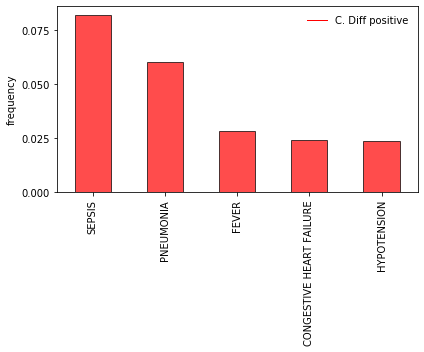

In [7]:
ADMISSIONS_CDiff_pos_df['DIAGNOSIS'].value_counts(normalize=True).head().plot(kind='bar',edgecolor='k',facecolor='r',alpha=0.7)
plt.xticks();
plt.yticks([0.0,0.025,0.05,0.075]);
plt.ylabel('frequency');
#create symbols for legend
cdiff_pos_line = mlines.Line2D([], [], c='r', lw=1.0, label='C. Diff positive');
plt.legend(handles=[cdiff_pos_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('week1_demo_Cdiff_pos.jpg')

In [10]:
ADMISSIONS_CDiff_pos_df['DIAGNOSIS'].value_counts(normalize=True).to_csv("~/cdiff_pos.csv")

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [8]:
#try to get ADMISSIONS_CDiff_neg; it works!
ADMISSIONS_CDiff_neg_df = pd.concat([ADMISSIONS_df,ADMISSIONS_CDiff_pos_df]).drop_duplicates(keep=False)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


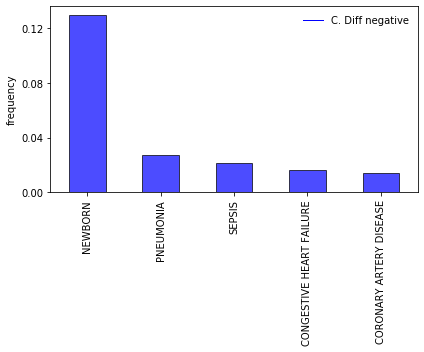

In [9]:
ADMISSIONS_CDiff_neg_df['DIAGNOSIS'].value_counts(normalize=True).head().plot(kind='bar',edgecolor='k',facecolor='b',alpha=0.7)
plt.xticks();
plt.yticks([0.0,0.04,0.08,0.12]);
plt.ylabel('frequency');
#create legend
cdiff_neg_line = mlines.Line2D([], [], c='b', lw=1.0, label='C. Diff negative');
plt.legend(handles=[cdiff_neg_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
plt.savefig('week1_demo_Cdiff_neg.jpg')

In [10]:
ADMISSIONS_CDiff_neg_df["target"]=0

In [14]:
ADMISSIONS_CDiff_neg_df.head()

,ADMISSION_LOCATION,ADMISSION_TYPE,ADMITTIME,DEATHTIME,DIAGNOSIS,DISCHARGE_LOCATION,DISCHTIME,EDOUTTIME,EDREGTIME,ETHNICITY,HADM_ID,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,LANGUAGE,MARITAL_STATUS,RELIGION,ROW_ID,SUBJECT_ID,target
0,EMERGENCY ROOM ADMIT,EMERGENCY,2196-04-09 12:26:00,NaN,BENZODIAZEPINE OVERDOSE,DISC-TRAN CANCER/CHLDRN H,2196-04-10 15:54:00,2196-04-09 13:24:00,2196-04-09 10:06:00,WHITE,165315,1,0,Private,NaN,MARRIED,UNOBTAINABLE,21,22,0
1,PHYS REFERRAL/NORMAL DELI,ELECTIVE,2153-09-03 07:15:00,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,HOME HEALTH CARE,2153-09-08 19:10:00,NaN,NaN,WHITE,152223,1,0,Medicare,NaN,MARRIED,CATHOLIC,22,23,0
2,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,2157-10-18 19:34:00,NaN,BRAIN MASS,HOME HEALTH CARE,2157-10-25 14:00:00,NaN,NaN,WHITE,124321,1,0,Medicare,ENGL,MARRIED,CATHOLIC,23,23,0
3,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,2139-06-06 16:14:00,NaN,INTERIOR MYOCARDIAL INFARCTION,HOME,2139-06-09 12:48:00,NaN,NaN,WHITE,161859,1,0,Private,NaN,SINGLE,PROTESTANT QUAKER,24,24,0
4,EMERGENCY ROOM ADMIT,EMERGENCY,2160-11-02 02:06:00,NaN,ACUTE CORONARY SYNDROME,HOME,2160-11-05 14:55:00,2160-11-02 04:27:00,2160-11-02 01:01:00,WHITE,129635,1,0,Private,NaN,MARRIED,UNOBTAINABLE,25,25,0


In [11]:
ADMISSIONS_CDiff_pos_trunc_df = ADMISSIONS_CDiff_pos_df[["ADMISSION_TYPE","ADMISSION_LOCATION","ADMITTIME","DISCHTIME",
                                                         "ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                         "HAS_CHARTEVENTS_DATA","target"]]
ADMISSIONS_CDiff_neg_trunc_df = ADMISSIONS_CDiff_neg_df[["ADMISSION_TYPE","ADMISSION_LOCATION","ADMITTIME","DISCHTIME",
                                                         "ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                         "HAS_CHARTEVENTS_DATA","target"]]



In [12]:
ADMISSIONS_CDiff_pos_trunc_df.reset_index(drop=True,inplace=True)
ADMISSIONS_CDiff_pos_trunc_df.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,ADMITTIME,DISCHTIME,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,2135-01-30 20:50:00,2135-02-08 02:08:00,WHITE,1,1,1
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,2167-11-29 16:25:00,2167-12-23 12:20:00,WHITE,0,1,1
2,EMERGENCY,PHYS REFERRAL/NORMAL DELI,2140-02-16 14:40:00,2140-02-25 19:30:00,BLACK/AFRICAN AMERICAN,0,1,1
3,EMERGENCY,EMERGENCY ROOM ADMIT,2166-07-21 23:38:00,2166-07-28 12:45:00,WHITE,0,1,1
4,EMERGENCY,EMERGENCY ROOM ADMIT,2127-06-16 01:33:00,2127-06-28 20:25:00,WHITE,0,1,1


In [13]:
ADMISSIONS_CDiff_neg_trunc_df.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,ADMITTIME,DISCHTIME,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,2196-04-09 12:26:00,2196-04-10 15:54:00,WHITE,0,1,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,2153-09-03 07:15:00,2153-09-08 19:10:00,WHITE,0,1,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2157-10-18 19:34:00,2157-10-25 14:00:00,WHITE,0,1,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2139-06-06 16:14:00,2139-06-09 12:48:00,WHITE,0,1,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,2160-11-02 02:06:00,2160-11-05 14:55:00,WHITE,0,1,0


In [14]:
ADMISSIONS_CDiff_pos_trunc_df.insert(4,"LOS",0)
ADMISSIONS_CDiff_neg_trunc_df.insert(4,"LOS",0)

In [15]:
ADMISSIONS_CDiff_pos_trunc_df["ADMITTIME"] = pd.to_datetime(ADMISSIONS_CDiff_pos_trunc_df["ADMITTIME"])
ADMISSIONS_CDiff_pos_trunc_df["DISCHTIME"] = pd.to_datetime(ADMISSIONS_CDiff_pos_trunc_df["DISCHTIME"])
ADMISSIONS_CDiff_neg_trunc_df["ADMITTIME"] = pd.to_datetime(ADMISSIONS_CDiff_neg_trunc_df["ADMITTIME"])
ADMISSIONS_CDiff_neg_trunc_df["DISCHTIME"] = pd.to_datetime(ADMISSIONS_CDiff_neg_trunc_df["DISCHTIME"])

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [16]:
ADMISSIONS_CDiff_pos_trunc_df["LOS"] = ADMISSIONS_CDiff_pos_trunc_df["DISCHTIME"] - ADMISSIONS_CDiff_pos_trunc_df["ADMITTIME"]

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
ADMISSIONS_CDiff_pos_trunc_df["LOS"]=ADMISSIONS_CDiff_pos_trunc_df["LOS"].dt.total_seconds()/datetime.timedelta(days=1).total_seconds()

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
ADMISSIONS_CDiff_neg_trunc_df["LOS"] = ADMISSIONS_CDiff_neg_trunc_df["DISCHTIME"] - ADMISSIONS_CDiff_neg_trunc_df["ADMITTIME"]

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
ADMISSIONS_CDiff_neg_trunc_df["LOS"]=ADMISSIONS_CDiff_neg_trunc_df["LOS"].dt.total_seconds()/datetime.timedelta(days=1).total_seconds()

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
ADMISSIONS_CDiff_pos_trunc_df["LOS"]= ADMISSIONS_CDiff_pos_trunc_df["LOS"].round(2)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
ADMISSIONS_CDiff_neg_trunc_df["LOS"]= ADMISSIONS_CDiff_neg_trunc_df["LOS"].round(2)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


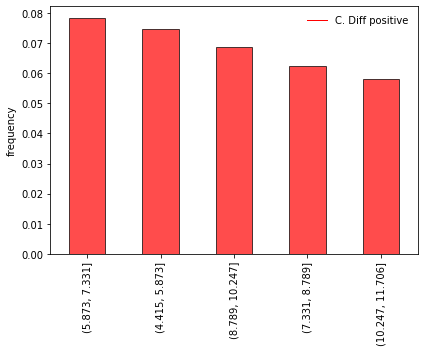

In [22]:
ADMISSIONS_CDiff_pos_trunc_df['LOS'].value_counts(normalize=True,bins=100).head().plot(kind='bar',edgecolor='k',facecolor='r',alpha=0.7)
plt.xticks();
#plt.yticks([0.0,0.025,0.05,0.075]);
plt.ylabel('frequency');
#create symbols for legend
cdiff_pos_line = mlines.Line2D([], [], c='r', lw=1.0, label='C. Diff positive');
plt.legend(handles=[cdiff_pos_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
#plt.savefig('week1_demo_Cdiff_pos.jpg')

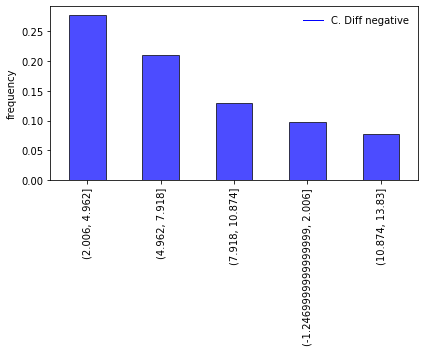

In [23]:
ADMISSIONS_CDiff_neg_trunc_df['LOS'].value_counts(normalize=True,bins=100).head().plot(kind='bar',edgecolor='k',facecolor='b',alpha=0.7)
plt.xticks();
#plt.yticks([0.0,0.04,0.08,0.12]);
plt.ylabel('frequency');
#create legend
cdiff_neg_line = mlines.Line2D([], [], c='b', lw=1.0, label='C. Diff negative');
plt.legend(handles=[cdiff_neg_line],frameon=False);
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.0,5.0];
#plt.savefig('week1_demo_Cdiff_neg.jpg')

In [153]:
ADMISSIONS_CDiff_neg_trunc_df.loc[ADMISSIONS_CDiff_neg_trunc_df["LOS"] < 0.0]

,ADMISSION_TYPE,ADMISSION_LOCATION,ADMITTIME,DISCHTIME,LOS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
425,URGENT,PHYS REFERRAL/NORMAL DELI,2177-03-23 16:17:00,2177-03-23 07:20:00,-0.37,WHITE,1,1,0
456,EMERGENCY,EMERGENCY ROOM ADMIT,2153-10-12 09:49:00,2153-10-12 06:29:00,-0.14,WHITE,1,1,0
692,EMERGENCY,EMERGENCY ROOM ADMIT,2197-07-31 20:18:00,2197-07-31 01:10:00,-0.80,UNKNOWN/NOT SPECIFIED,1,0,0
1911,NEWBORN,CLINIC REFERRAL/PREMATURE,2137-09-02 14:43:00,2137-09-02 12:00:00,-0.11,WHITE,1,1,0
1970,EMERGENCY,EMERGENCY ROOM ADMIT,2189-01-02 14:25:00,2189-01-02 12:00:00,-0.10,WHITE,1,1,0
2784,EMERGENCY,EMERGENCY ROOM ADMIT,2184-12-01 19:28:00,2184-12-01 16:50:00,-0.11,WHITE,0,1,0
3342,EMERGENCY,EMERGENCY ROOM ADMIT,2128-04-16 12:28:00,2128-04-16 12:00:00,-0.02,WHITE,1,1,0
3622,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2108-09-25 15:29:00,2108-09-25 12:00:00,-0.15,WHITE,1,1,0
3996,EMERGENCY,EMERGENCY ROOM ADMIT,2134-11-30 18:19:00,2134-11-30 12:00:00,-0.26,WHITE,1,1,0
4445,EMERGENCY,PHYS REFERRAL/NORMAL DELI,2153-05-27 11:14:00,2153-05-27 09:45:00,-0.06,BLACK/AFRICAN AMERICAN,1,1,0


In [24]:
ADMISSIONS_CDiff_pos_diag_df = ADMISSIONS_CDiff_pos_df[["DIAGNOSIS","target"]]
ADMISSIONS_CDiff_neg_diag_df = ADMISSIONS_CDiff_neg_df[["DIAGNOSIS","target"]]

In [25]:
ADMISSIONS_CDiff_pos_diag_df.insert(1,"D2",'k')

In [26]:
ADMISSIONS_CDiff_pos_diag_df.insert(2,"D3",'l')

In [27]:
ADMISSIONS_CDiff_pos_diag_df.insert(1,"D1",'j')

In [28]:
ADMISSIONS_CDiff_pos_diag_df.reset_index(drop=True,inplace=True)


In [31]:
ADMISSIONS_CDiff_pos_diag_df.head()

,DIAGNOSIS,D1,D2,D3,target
0,SEPSIS,SEPSIS,SEPSIS,SEPSIS,1
1,AORTIC STENOSIS;ATRIAL FIBRILLATION\ATRIOVENTR...,AORTIC STENOSIS,ATRIAL FIBRILLATION\ATRIOVENTRICULAR RECIPROCA...,MITRAL VALVE REPLACEMENT,1
2,STATUS POST KIDNEY TRANSPLANT;ELEVATED CREATININE,STATUS POST KIDNEY TRANSPLANT,ELEVATED CREATININE,ELEVATED CREATININE,1
3,WEAKNESS;ANEMIA;TELEMETRY,WEAKNESS,ANEMIA,TELEMETRY,1
4,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,1


In [37]:
ADMISSIONS_CDiff_pos_diag_df["DIAGNOSIS"].iloc[15].split(';')

['CIRRHOSIS BACTEREMIA',
 'VANCOMYCIN RESISTANT ENTEROCOCCUS',
 'METHICILLIN RESISTANT STAPH AUREUS']

In [38]:
ADMISSIONS_CDiff_pos_diag_df.shape

(1444, 4)

In [41]:
diag_feature_length = []
for row in ADMISSIONS_CDiff_pos_diag_df.itertuples():
    diag_feature_length.append(len(row.DIAGNOSIS.split(';')))

In [30]:
for idx,row in enumerate(ADMISSIONS_CDiff_pos_diag_df.itertuples(),1):
    diag_list = row.DIAGNOSIS.split(';')
    #print(diag_list)
    #print(idx)
    if len(diag_list) == 1:
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D1"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D2"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D3"]=diag_list[0]
    elif len(diag_list) == 2:
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D1"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D2"]=diag_list[1]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D3"]=random.choice(diag_list)
    else:
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D1"]=diag_list[0]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D2"]=diag_list[1]
        ADMISSIONS_CDiff_pos_diag_df.at[row.Index,"D3"]=diag_list[2]

In [32]:
ADMISSIONS_CDiff_neg_diag_df.insert(1,"D2",'k')

In [33]:
ADMISSIONS_CDiff_neg_diag_df.insert(2,"D3",'l')

In [34]:
ADMISSIONS_CDiff_neg_diag_df.insert(1,"D1",'j')

In [35]:
ADMISSIONS_CDiff_neg_diag_df.head()

,DIAGNOSIS,D1,D2,D3,target
0,BENZODIAZEPINE OVERDOSE,j,k,l,0
1,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,j,k,l,0
2,BRAIN MASS,j,k,l,0
3,INTERIOR MYOCARDIAL INFARCTION,j,k,l,0
4,ACUTE CORONARY SYNDROME,j,k,l,0


In [36]:
for idx,row in enumerate(ADMISSIONS_CDiff_neg_diag_df.itertuples(),1):
    if type(row.DIAGNOSIS) == str:
        diag_list = row.DIAGNOSIS.split(';')
        #print(diag_list)
        #print(idx)
        if len(diag_list) == 1:
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D1"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D2"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D3"]=diag_list[0]
        elif len(diag_list) == 2:
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D1"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D2"]=diag_list[1]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D3"]=random.choice(diag_list)
        else:
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D1"]=diag_list[0]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D2"]=diag_list[1]
            ADMISSIONS_CDiff_neg_diag_df.at[row.Index,"D3"]=diag_list[2]

In [51]:
max(diag_feature_length)

6

In [67]:
diag_feature_length = []
for row in ADMISSIONS_df.itertuples():
    if type(row.DIAGNOSIS) != str:
        print(row.DIAGNOSIS)
        #print(len(row.DIAGNOSIS.split(';')))
        #diag_feature_length.append(len(row.DIAGNOSIS.split(';')))

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [37]:
ADMISSIONS_CDiff_pos_preprocess = pd.concat([ADMISSIONS_CDiff_pos_trunc_df[["ADMISSION_TYPE","ADMISSION_LOCATION",
                                                                           "LOS","ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                                           "HAS_CHARTEVENTS_DATA"]]
                                            ,ADMISSIONS_CDiff_pos_diag_df[["D1","D2","D3","target"]]],axis=1)

In [38]:
ADMISSIONS_CDiff_pos_preprocess.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,LOS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,D1,D2,D3,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,8.22,WHITE,1,1,SEPSIS,SEPSIS,SEPSIS,1
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,23.83,WHITE,0,1,AORTIC STENOSIS,ATRIAL FIBRILLATION\ATRIOVENTRICULAR RECIPROCA...,MITRAL VALVE REPLACEMENT,1
2,EMERGENCY,PHYS REFERRAL/NORMAL DELI,9.20,BLACK/AFRICAN AMERICAN,0,1,STATUS POST KIDNEY TRANSPLANT,ELEVATED CREATININE,ELEVATED CREATININE,1
3,EMERGENCY,EMERGENCY ROOM ADMIT,6.55,WHITE,0,1,WEAKNESS,ANEMIA,TELEMETRY,1
4,EMERGENCY,EMERGENCY ROOM ADMIT,12.79,WHITE,0,1,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,ALTERED MENTAL STATUS,1


In [39]:
ADMISSIONS_CDiff_neg_preprocess = pd.concat([ADMISSIONS_CDiff_neg_trunc_df[["ADMISSION_TYPE","ADMISSION_LOCATION",
                                                                           "LOS","ETHNICITY","HOSPITAL_EXPIRE_FLAG",
                                                                           "HAS_CHARTEVENTS_DATA"]]
                                            ,ADMISSIONS_CDiff_neg_diag_df[["D1","D2","D3","target"]]],axis=1)

In [40]:
ADMISSIONS_CDiff_neg_preprocess.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,LOS,ETHNICITY,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,D1,D2,D3,target
0,EMERGENCY,EMERGENCY ROOM ADMIT,1.14,WHITE,0,1,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,BENZODIAZEPINE OVERDOSE,0
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,5.50,WHITE,0,1,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,6.77,WHITE,0,1,BRAIN MASS,BRAIN MASS,BRAIN MASS,0
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.86,WHITE,0,1,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,INTERIOR MYOCARDIAL INFARCTION,0
4,EMERGENCY,EMERGENCY ROOM ADMIT,3.53,WHITE,0,1,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,ACUTE CORONARY SYNDROME,0


In [41]:
ADMISSIONS_CDiff_preprocess = pd.concat([ADMISSIONS_CDiff_pos_preprocess,ADMISSIONS_CDiff_neg_preprocess],ignore_index=True)

In [40]:
ADMISSIONS_CDiff_preprocess.dtypes

ADMISSION_TYPE           object
ADMISSION_LOCATION       object
LOS                     float64
ETHNICITY                object
HOSPITAL_EXPIRE_FLAG      int64
HAS_CHARTEVENTS_DATA      int64
D1                       object
D2                       object
D3                       object
target                    int64
dtype: object

In [42]:
from sklearn.preprocessing import LabelBinarizer

In [43]:
#admission type
lb_style = LabelBinarizer()
lb_adm_type = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["ADMISSION_TYPE"])
adm_type = pd.DataFrame(lb_adm_type, columns=lb_style.classes_)
#admission location
lb_style = LabelBinarizer()
lb_adm_loc = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["ADMISSION_LOCATION"])
adm_loc = pd.DataFrame(lb_adm_loc, columns=lb_style.classes_)
#ethnicity
lb_style = LabelBinarizer()
lb_race = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["ETHNICITY"])
race = pd.DataFrame(lb_race, columns=lb_style.classes_)
#diagnosis
lb_style = LabelBinarizer()
lb_d1 = lb_style.fit_transform(ADMISSIONS_CDiff_preprocess["D1"])
d1 =  pd.DataFrame(lb_d1, columns=lb_style.classes_)

In [57]:
d1["ABDOMINAL PAIN"].head()

0    0
1    0
2    0
3    0
4    0
Name: ABDOMINAL PAIN, dtype: int64

In [47]:
admissions_digitized_df = pd.concat([adm_type,adm_loc,race,ADMISSIONS_CDiff_preprocess[["LOS","HOSPITAL_EXPIRE_FLAG","HAS_CHARTEVENTS_DATA","target"]]],axis=1)
admissions_digitized_df.head()

,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,UNKNOWN/NOT SPECIFIED,WHITE,WHITE - BRAZILIAN,WHITE - EASTERN EUROPEAN,WHITE - OTHER EUROPEAN,WHITE - RUSSIAN,LOS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,8.22,1,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,23.83,0,1,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,9.20,0,1,1
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,6.55,0,1,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,12.79,0,1,1


In [50]:
corr = admissions_digitized_df.corr()
corr.style.background_gradient(cmap='coolwarm')
#plt.savefig('./week_2/week2_admissions_features_corr_matrix_no_diagnosis.jpg')

In [52]:
corr_html = corr.style.background_gradient(cmap='coolwarm').render()

In [54]:
#import imgkit
#imgkit.from_string(corr_html, './week_2/admissions_features_corr_matrix_no_diagnosis.jpg')

In [49]:
#admissions_digitized_d1_df = pd.concat([d1,ADMISSIONS_CDiff_preprocess["target"]],axis=1)

In [52]:
#admissions_digitized_d1_df.to_csv("./data/admissions/admissions_digitized_d1.csv")

In [ ]:
#corr2 = admissions_digitized_d1_df.corr()
#corr2.style.background_gradient(cmap='coolwarm')

## OK THERE ARE WAAY TOO MANY FEATURES

### Let's make a simplified version of the dataset

In [44]:
admissions_digitized_trunc_df = pd.concat([adm_type,adm_loc,race,d1[["SEPSIS","PNEUMONIA","FEVER","CONGESTIVE HEART FAILURE","HYPOTENSION","ABDOMINAL PAIN","ALTERED MENTAL STATUS","COLITIS","PANCREATITIS","UPPER GI BLEED","DIARRHEA"]],ADMISSIONS_CDiff_preprocess[["LOS","HOSPITAL_EXPIRE_FLAG","HAS_CHARTEVENTS_DATA","target"]]],axis=1)

In [52]:
admissions_digitized_trunc_balanced_df = admissions_digitized_trunc_df.head(1444*2)

In [53]:
admissions_digitized_trunc_balanced_df.tail()

,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,DIARRHEA,LOS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
2883,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1.98,0,1,0
2884,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,19.77,0,1,0
2885,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,43.77,0,1,0
2886,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,10.58,0,1,0
2887,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,4.16,0,1,0


In [54]:
admissions_digitized_trunc_balanced_df.head()

,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,DIARRHEA,LOS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8.22,1,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,23.83,0,1,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,9.20,0,1,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,6.55,0,1,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,12.79,0,1,1


In [63]:
admissions_digitized_trunc_df.shape

(61864, 69)

In [104]:
corr2 = admissions_digitized_trunc_df.corr()
corr2.style.background_gradient(cmap='coolwarm')

In [50]:
admissions_digitized_trunc_df.head()

,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,DIARRHEA,LOS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8.22,1,1,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,23.83,0,1,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,9.20,0,1,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,6.55,0,1,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,12.79,0,1,1


In [59]:
admissions_digitized_trunc_shuffled_df = admissions_digitized_trunc_df.copy()

In [60]:
admissions_digitized_trunc_shuffled_df = admissions_digitized_trunc_shuffled_df.sample(frac=1).reset_index(drop=True)

In [61]:
admissions_digitized_trunc_shuffled_df.head()

,ELECTIVE,EMERGENCY,NEWBORN,URGENT,** INFO NOT AVAILABLE **,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,HMO REFERRAL/SICK,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,...,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,DIARRHEA,LOS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,target
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10.32,0,1,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,11.86,0,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7.08,0,1,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,5.98,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7.11,0,1,0


In [55]:
admissions_digitized_trunc_balanced_df = admissions_digitized_trunc_balanced_df.sample(frac=1).reset_index(drop=True)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
X = admissions_digitized_trunc_shuffled_df.loc[:, admissions_digitized_trunc_shuffled_df.columns != 'target']
y = admissions_digitized_trunc_shuffled_df.loc[:, admissions_digitized_trunc_shuffled_df.columns == 'target']

In [67]:
X_train_balanced = admissions_digitized_trunc_balanced_df.loc[:, admissions_digitized_trunc_balanced_df.columns != 'target']
y_train_balanced = admissions_digitized_trunc_balanced_df.loc[:, admissions_digitized_trunc_balanced_df.columns == 'target']

In [74]:
y.sum()

target    1444
dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
y_train.sum()

target    1031
dtype: int64

In [78]:
y_train.shape

(43304, 1)

In [83]:
logisticRegr = LogisticRegression(C=0.5,penalty='l1')

In [84]:
logisticRegr.fit(X_train_balanced, y_train_balanced)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred = logisticRegr.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)
#print(classification_report(y_test, y_pred))

0.0792413613925695

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76     18147
           1       0.04      0.74      0.08       413

    accuracy                           0.62     18560
   macro avg       0.52      0.68      0.42     18560
weighted avg       0.97      0.62      0.74     18560



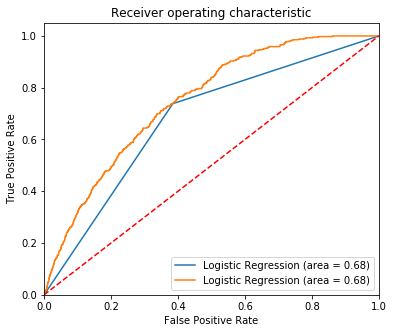

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr,tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
fpr_0,tpr_0, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr_0, tpr_0, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Understand difference between y_pred and predict_proba

In [91]:
y_pred.sum()

7285

In [92]:
logisticRegr.predict_proba(X_test)[:,1].sum()

8024.850477126197

In [93]:
logisticRegr.predict_proba(X_test)

array([[9.91249856e-01, 8.75014437e-03],
       [9.80963978e-01, 1.90360223e-02],
       [9.65218920e-01, 3.47810803e-02],
       ...,
       [9.99827182e-01, 1.72817723e-04],
       [9.81046709e-01, 1.89532912e-02],
       [9.99697220e-01, 3.02779906e-04]])

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf=RandomForestClassifier(n_estimators=100,max_depth=10,class_weight='balanced')

In [95]:
clf.fit(X_train,y_train)

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [96]:
y_pred=clf.predict(X_test)

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [98]:
roc_auc_score(y_test, y_pred)

0.6954865904769377

In [290]:
#admissions_digitized_trunc_take2_df = pd.concat([adm_type,adm_loc,race,d1[["SEPSIS","PNEUMONIA","FEVER","CONGESTIVE HEART FAILURE","HYPOTENSION","ABDOMINAL PAIN","ALTERED MENTAL STATUS","COLITIS","PANCREATITIS","UPPER GI BLEED","DIARRHEA"]],ADMISSIONS_CDiff_preprocess[["LOS","HOSPITAL_EXPIRE_FLAG","HAS_CHARTEVENTS_DATA","target"]]],axis=1)

In [303]:
admissions_digitized_trunc_take2_df = pd.concat([adm_type[["EMERGENCY"]],race[["WHITE","ASIAN","HISPANIC OR LATINO","BLACK/AFRICAN AMERICAN"]],d1[["SEPSIS","PNEUMONIA","FEVER","CONGESTIVE HEART FAILURE","HYPOTENSION","ABDOMINAL PAIN","ALTERED MENTAL STATUS","COLITIS","PANCREATITIS","UPPER GI BLEED","DIARRHEA"]],ADMISSIONS_CDiff_preprocess[["LOS","target"]]],axis=1)

In [304]:
admissions_digitized_trunc_take2_df = admissions_digitized_trunc_take2_df.sample(frac=1).reset_index(drop=True)

In [305]:
admissions_digitized_trunc_take2_df.head()

,EMERGENCY,WHITE,ASIAN,HISPANIC OR LATINO,BLACK/AFRICAN AMERICAN,SEPSIS,PNEUMONIA,FEVER,CONGESTIVE HEART FAILURE,HYPOTENSION,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,DIARRHEA,LOS,target
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8.54,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.22,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.47,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.21,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.61,0


In [306]:
X = admissions_digitized_trunc_take2_df.loc[:, admissions_digitized_trunc_take2_df.columns != 'target']
y = admissions_digitized_trunc_take2_df.loc[:, admissions_digitized_trunc_take2_df.columns == 'target']

In [295]:
y.sum()

target    1444
dtype: int64

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [308]:
X_train.head()

,EMERGENCY,WHITE,ASIAN,HISPANIC OR LATINO,BLACK/AFRICAN AMERICAN,SEPSIS,PNEUMONIA,FEVER,CONGESTIVE HEART FAILURE,HYPOTENSION,ABDOMINAL PAIN,ALTERED MENTAL STATUS,COLITIS,PANCREATITIS,UPPER GI BLEED,DIARRHEA,LOS
10593,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.85
48499,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.79
49551,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.78
37781,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.98
18776,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8.89


In [309]:
y_train.sum()

target    1006
dtype: int64

In [310]:
logisticRegr = LogisticRegression(penalty='l2',max_iter=10000)

In [311]:
logisticRegr.fit(X_train.to_numpy(), y_train["target"].tolist())

/home/walter/software/anaconda3/envs/cdiff/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [282]:
X_train.to_numpy()

array([[ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  5.02],
       [ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  , 21.29],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  2.5 ],
       ...,
       [ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  7.76],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  2.65],
       [ 1.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  5.87]])

In [312]:
y_pred = logisticRegr.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.004514672686230248

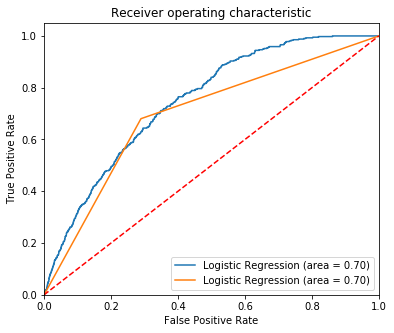

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr_0,tpr_0, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])
fpr_1,tpr_1, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr_0, tpr_0, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()